## Read 2017 Data 

In [71]:
import pandas as pd 
hours1 = pd.read_csv('hours_2017_1.csv', encoding='euc_kr')
hours2 = pd.read_csv('hours_2017_2.csv', encoding='euc_kr')
hours3 = pd.read_csv('hours_2017_3.csv', encoding='euc_kr')
hours4 = pd.read_csv('hours_2017_4.csv', encoding='euc_kr')
hours5 = pd.read_csv('hours_2017_5.csv', encoding='euc_kr')
hours6 = pd.read_csv('hours_2017_6.csv', encoding='euc_kr')


1. 대여시간 야간 제외 -- pending  
2. 연령대 남 20-39, 여 20-29 



In [72]:
h2017 = pd.concat([hours1, hours2, hours3, hours4, hours5, hours6])

## 1. Filter Data - 20 (m+f) - 30 (m) only 

In [74]:
age_20 = h2017["'연령대코드'"] == "'20대'"
age_30 = h2017["'연령대코드'"] == "'30대'"
men = h2017["'성별'"] == "'M'"
women = h2017["'성별'"] == "'F'"

h2017_age2030 = h2017[(age_20) | (age_30 & men) ]


## Format Date

In [75]:
# import datetime as dt
# h2017_age2030['date'] = [ dt.datetime.strptime(d[1:11], '%Y-%m-%d').date() for d in h2017_age2030["'대여일자'"]]
# h2017_age2030['DateFormat'] = pd.to_datetime(h2017_age2030['date'])
# h2017_age2030['Day_of_Week'] = h2017_age2030['DateFormat'].dt.day_name()
# h2017_age2030.head()
# h2017_age2030.info() ## 312 mb, 2558367 use 

In [76]:
h2017_2030 = h2017_age2030.copy()


## Daily by station - with station code

### 1. Sum by station

In [77]:
sum_by_station = h2017_2030.groupby(["'대여소번호'", "'대여소'"]).agg({"'이용건수'": 'sum', "'이동거리(M)'": 'sum', "'이동시간(분)'": 'sum'}).round(1).sort_values(by="'이용건수'", ascending=False)
sum_by_station.head()

,,'이용건수','이동거리(M)','이동시간(분)'
'대여소번호','대여소',,,
'207',' 여의나루역 1번출구 앞',33378,183386950,1648690
'113',' 홍대입구역 2번출구 앞',30044,80255020,692762
'502',' 뚝섬유원지역 1번출구 앞',26011,143238830,1210131
'358',' 성대입구 사거리',16374,36328540,273987
'152',' 마포구민체육센터 앞',15919,79056050,604532


### 1-1. Yeoyui 

In [78]:
yeoyui_station = "' 여의나루역 1번출구 앞'"
yeoyui = h2017_age2030[h2017_age2030["'대여소'"] == yeoyui_station]
yeoyui.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15675 entries, 574 to 598984
Data columns (total 12 columns):
'대여일자'       15675 non-null object
'대여시간'       15675 non-null object
'대여소번호'      15675 non-null object
'대여소'        15675 non-null object
'대여구분코드'     15675 non-null object
'성별'         15675 non-null object
'연령대코드'      15675 non-null object
'이용건수'       15675 non-null int64
'운동량'        15675 non-null float64
'탄소량'        15675 non-null float64
'이동거리(M)'    15675 non-null int64
'이동시간(분)'    15675 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.6+ MB


In [79]:
yeoyui.head()

,'대여일자','대여시간','대여소번호','대여소','대여구분코드','성별','연령대코드','이용건수','운동량','탄소량','이동거리(M)','이동시간(분)'
574,'2017-01-01','11','207',' 여의나루역 1번출구 앞','일일(회원)','F','20대',1,16.47,0.19,800,7
876,'2017-01-01','14','207',' 여의나루역 1번출구 앞','정기','M','20대',1,47.88,0.30,1300,6
1297,'2017-01-01','16','207',' 여의나루역 1번출구 앞','일일(회원)','M','20대',1,240.59,2.31,9960,36
1311,'2017-01-01','16','207',' 여의나루역 1번출구 앞','일일(비회원)','F','20대',2,356.50,3.21,13850,100
1400,'2017-01-01','17','207',' 여의나루역 1번출구 앞','정기','M','20대',1,25.78,0.16,700,3


In [80]:
import datetime as dt
yeoyui['date'] = [d[1:11] for d in yeoyui["'대여일자'"]]
yeoyui['Date'] = pd.to_datetime(yeoyui['date'])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [81]:
yeoyui.head()
yeoyui.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15675 entries, 574 to 598984
Data columns (total 14 columns):
'대여일자'       15675 non-null object
'대여시간'       15675 non-null object
'대여소번호'      15675 non-null object
'대여소'        15675 non-null object
'대여구분코드'     15675 non-null object
'성별'         15675 non-null object
'연령대코드'      15675 non-null object
'이용건수'       15675 non-null int64
'운동량'        15675 non-null float64
'탄소량'        15675 non-null float64
'이동거리(M)'    15675 non-null int64
'이동시간(분)'    15675 non-null int64
date         15675 non-null object
Date         15675 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 1.8+ MB


In [82]:
y17 = yeoyui.groupby(['Date', "'성별'"], as_index=False).agg({"'이용건수'": 'sum'})
new_y17 = y17.rename(columns={"'성별'": 'Sex', "'이용건수'": 'Num_of_Use'})

In [86]:
new_y17.head()


,Date,Sex,Num_of_Use
0,2017-01-01,'F',5
1,2017-01-01,'M',6
2,2017-01-02,'M',8
3,2017-01-03,'F',5
4,2017-01-03,'M',14


In [87]:
mf_y17 = new_y17.groupby('Date', as_index=False).agg({'Num_of_Use': 'sum'})
mf_y17.head()

,Date,Num_of_Use
0,2017-01-01,11
1,2017-01-02,8
2,2017-01-03,19
3,2017-01-04,26
4,2017-01-05,18


In [91]:
pv_y17 = new_y17.pivot(index='Date', columns='Sex', values='Num_of_Use')
pv_y17.head()

Sex,'F','M'
Date,,
2017-01-01,5.0,6.0
2017-01-02,NaN,8.0
2017-01-03,5.0,14.0
2017-01-04,5.0,21.0
2017-01-05,2.0,16.0


### 1-2 Visualization

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

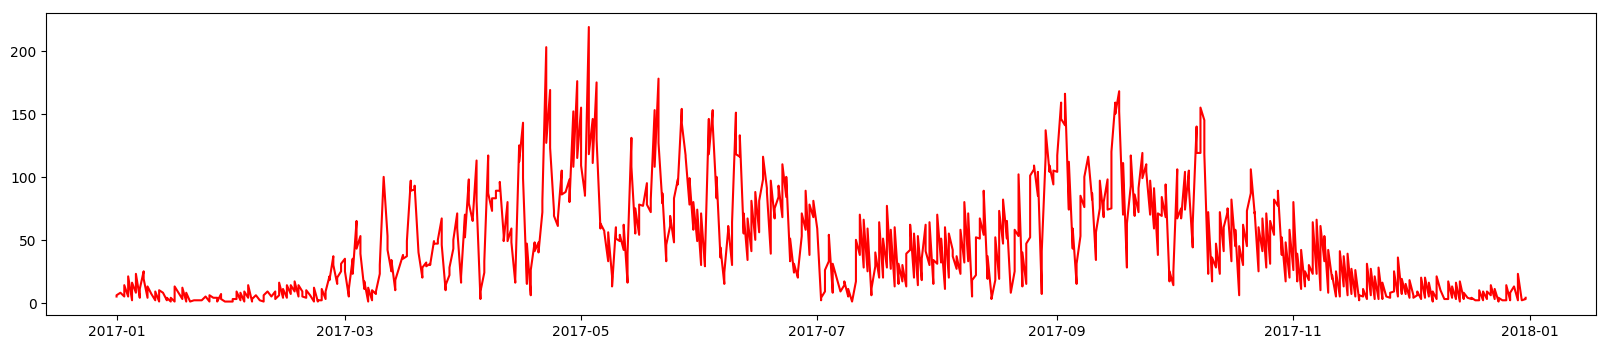

In [89]:
fig, ax = plt.subplots(figsize=(20, 4), dpi=100)
y = new_y17['Num_of_Use']
x = new_y17['Date']
plt.plot(x, y, '-r')


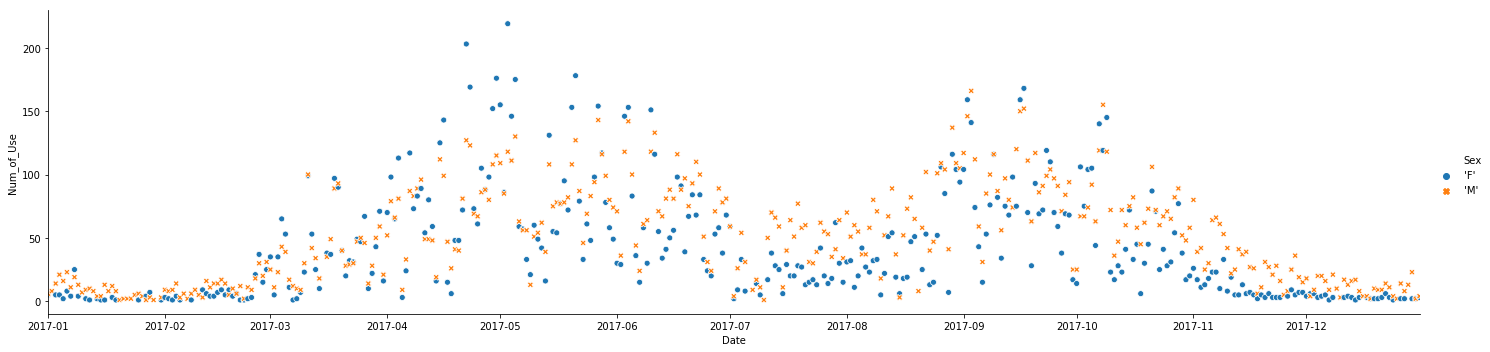

In [85]:
rl = sns.relplot(x='Date', y='Num_of_Use', data=new_y17, hue='Sex', style='Sex', aspect=4)
rl.set(xlim=('2017-01-01', '2017-12-31'))

In [115]:
import numpy as np
dt = np.arange('2017-01', '2018-01', dtype='datetime64[M]')
dt

array(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
      dtype='datetime64[M]')

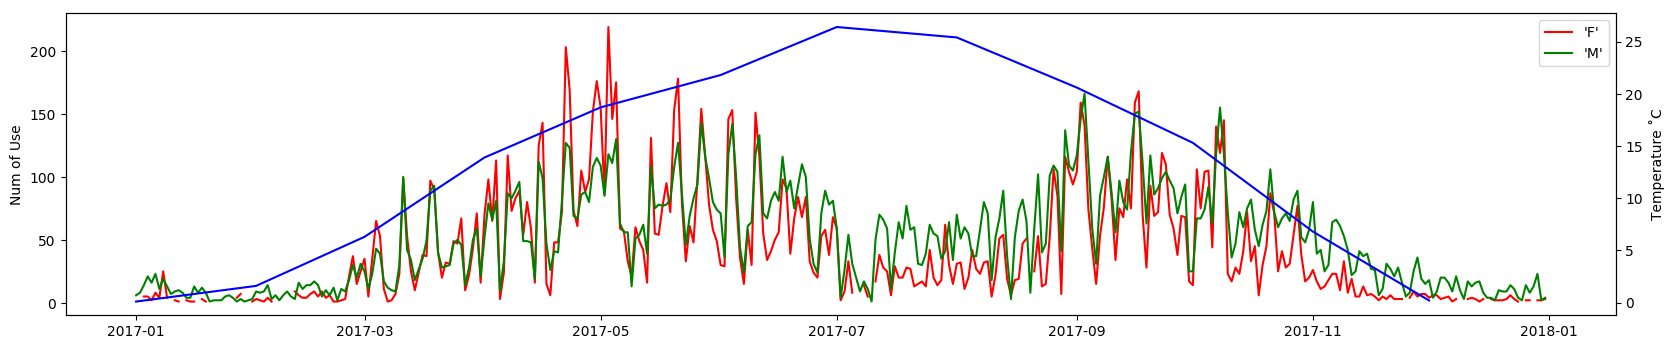

In [136]:
fig1, ax1 = plt.subplots(figsize=(20, 4), dpi=100)
nn = pv_y17.reset_index()
y1 = nn["'F'"]
y2 = nn["'M'"]
x1 = nn['Date']
ax1.plot(x1, y1, '-r')
ax1.plot(x1, y2, '-g')
ax1.legend(loc=0)
ax1.set_ylabel('Num of Use')

ax2 = ax1.twinx()
x3 = dt
y3 = [0.1, 1.6, 6.3, 13.9, 18.7, 21.8, 26.4, 25.4, 20.6, 15.3, 6.8, 0.2]
ax2.plot(x3, y3, '-b')
ax2.set_ylabel('Temperature ˚C')
fig1.savefig('2017_Correlation_Temperature_Bike_Use')

In [97]:
rl.savefig('2017use.png')

### 2. Station Location Data

In [ ]:
station = pd.read_excel('station1804.xlsx')
station.set_index('대여소번호')
# station.info() ## 1163 stations 


In [ ]:
# 1. join 
# 2. geo data frame 
# 3. geometry 
# 4. plot 

import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point


In [ ]:
st = GeoDataFrame(station)

In [ ]:
st= st.astype({'대여소번호': object})

In [ ]:
st.head()